In [1]:
import numpy as np
from qiskit.visualization import array_to_latex
from IPython.display import *

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1/2 + M2/2;

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [2]:
from qiskit.quantum_info import *
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j)/ 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

display(u.draw("text"))
display(u.draw("Latex"))
display(u.draw("Latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

'\\frac{\\sqrt{2}}{2} |0\\rangle+\\frac{\\sqrt{2}}{2} |1\\rangle'

In [3]:
display(u.is_valid())
display(v.is_valid())

True

True

In [4]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement:")
display(state.draw("latex"))

Measured: 0
Post-measurement:


<IPython.core.display.Latex object>

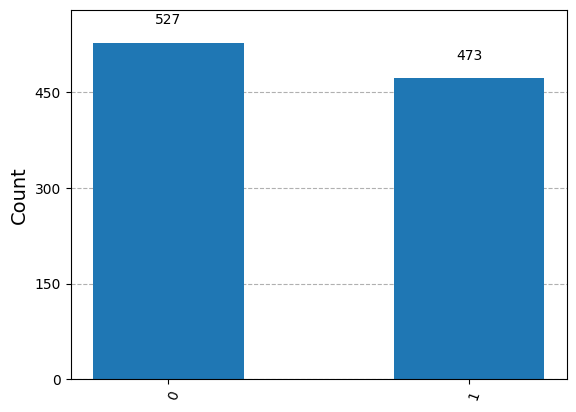

In [5]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [6]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, np.exp(1.0j*np.pi/2)]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(Y.draw("latex"))
display(H.draw("latex"))
display(S.draw("latex"))
display(T.draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
display(v.draw("latex"))

<IPython.core.display.Latex object>

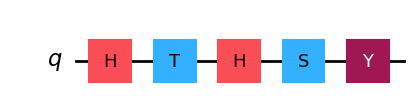

<IPython.core.display.Latex object>

In [10]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw(output="latex"))

In [11]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

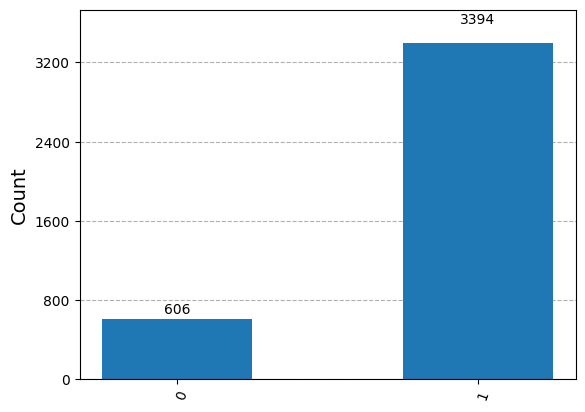

In [27]:
stat = v.sample_counts(4000)
display(plot_histogram(stat))